# **1. Perkenalan Dataset**


# Eksperimen Dataset – Loan Prediction (Kriteria 1)

Notebook ini berisi proses eksperimen terhadap dataset pelatihan sebagai bagian dari proyek MLOps:
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Preprocessing Manual
4. Ringkasan hasil

## Sumber Dataset
Dataset yang digunakan adalah dataset Loan Prediction / Loan Approval (umum digunakan untuk tugas klasifikasi kelayakan pinjaman).
Sumber referensi dataset: Kaggle (Loan Prediction Dataset) atau repositori dataset serupa.

> Catatan: Pada submission, saya menyediakan dataset mentah pada folder `dataset_raw/` dan melakukan eksperimen/preprocessing manual di notebook ini.


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

RANDOM_STATE = 42


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
DATA_PATH = "loan_pred.csv"  # sesuaikan jika nama file berbeda

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        f"Dataset tidak ditemukan di path: {DATA_PATH}. "
        "Pastikan file CSV berada di folder yang sama dengan notebook, atau ubah DATA_PATH."
    )

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()


Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Melihat struktur dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Statistik deskriptif untuk fitur numerik
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Cek jumlah missing values tiap kolom
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


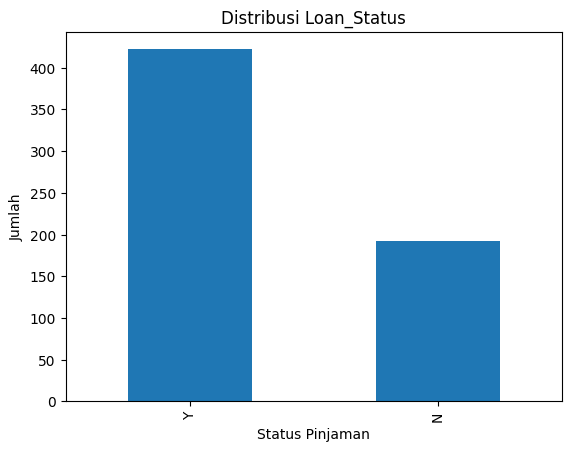

In [8]:
import matplotlib.pyplot as plt

df['Loan_Status'].value_counts().plot(kind='bar')
plt.title("Distribusi Loan_Status")
plt.xlabel("Status Pinjaman")
plt.ylabel("Jumlah")
plt.show()


### Insight dari EDA
- Dataset memiliki 614 baris dan 13 kolom.
- Terdapat beberapa missing value pada kolom seperti LoanAmount dan Credit_History.
- Target Loan_Status menunjukkan distribusi kelas yang relatif tidak seimbang.
- Diperlukan proses preprocessing sebelum data digunakan untuk pelatihan model.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


## Export Data Bersih (train_clean.csv & test_clean.csv)

Bagian ini mengekspor hasil preprocessing menjadi dua file CSV siap training.

In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hardcode input & output (karena notebook)
INPUT_PATH = "loan_pred.csv"
OUTPUT_DIR = "data_clean"

df_clean = pd.read_csv(INPUT_PATH)

# 1) Buang ID
if "Loan_ID" in df_clean.columns:
    df_clean = df_clean.drop("Loan_ID", axis=1)

# 2) Handling missing values
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

for col in num_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 3) Encode target -> 0/1
df_clean["Loan_Status"] = df_clean["Loan_Status"].map({"Y": 1, "N": 0})

# 4) One-hot encoding kategori
df_clean = pd.get_dummies(df_clean, columns=[c for c in cat_cols if c in df_clean.columns], drop_first=True)

# 5) Scaling kolom numerik (fit di train saja)
scale_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
scale_cols = [c for c in scale_cols if c in df_clean.columns]

X = df_clean.drop("Loan_Status", axis=1)
y = df_clean["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# 6) Save
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

train_path = os.path.join(OUTPUT_DIR, "train_clean.csv")
test_path = os.path.join(OUTPUT_DIR, "test_clean.csv")

train_set.to_csv(train_path, index=False)
test_set.to_csv(test_path, index=False)

print("Saved:", train_path, "| shape:", train_set.shape)
print("Saved:", test_path, "| shape:", test_set.shape)


In [10]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_features, categorical_features


(Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [12]:
X_processed = preprocessor.fit_transform(X)
X_processed.shape


(614, 634)

In [ ]:
feature_names = preprocessor.get_feature_names_out()

# Ubah hasil preprocessing ke DataFrame
X_processed_df = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
    columns=feature_names
)

# Gabungkan dengan target
clean_df = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# Buat folder output jika belum ada
output_dir = "dataset_preprocessed"
os.makedirs(output_dir, exist_ok=True)

# Simpan ke CSV
output_path = os.path.join(output_dir, "loan_clean.csv")
clean_df.to_csv(output_path, index=False)

print(f"Dataset bersih berhasil disimpan di: {output_path}")
print("Shape dataset akhir:", clean_df.shape)


### Kesimpulan Preprocessing
- Missing values pada fitur numerik ditangani menggunakan median.
- Missing values pada fitur kategorikal ditangani menggunakan modus.
- Fitur kategorikal diencoding menggunakan One-Hot Encoding.
- Fitur numerik distandarisasi menggunakan StandardScaler.
- Dataset kini siap digunakan untuk tahap pelatihan model machine learning.

